<a href="https://colab.research.google.com/github/ranjith-25/Machine-learning-projects/blob/main/Web_Scrapping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEB SCRAPING OF AMAZON PRODUCT DATA**

In [ ]:
#Importing the libraries
import requests
from bs4 import BeautifulSoup as bs #BeautifulSoup - Web Scraping tool

In [ ]:
url=[]
url = ['https://www.amazon.in/s?i=computers&bbn=976392031&rh=n%3A4364643031&ref=mega_elec_s23_2_1_2_5','https://www.amazon.in/s?i=computers&bbn=976392031&rh=n%3A4364643031&page=2&qid=1682773412&ref=sr_pg_2','https://www.amazon.in/s?i=computers&bbn=976392031&rh=n%3A4364643031&page=3&qid=1682773424&ref=sr_pg_3','https://www.amazon.in/s?i=computers&bbn=976392031&rh=n%3A4364643031&page=6&qid=1684348694&ref=sr_pg_6']

page1 = requests.get(url[0])
page1

<Response [200]>

In [ ]:
page2 = requests.get(url[1])
page2

<Response [200]>

In [ ]:
page3 = requests.get(url[2])
page3

<Response [200]>

In [ ]:
page4 = requests.get(url[3])
page4

<Response [200]>

In [ ]:
soup1 = bs(page1.content,'html.parser') #convert source code into readable format
soup2 = bs(page2.content,'html.parser')
soup3 = bs(page3.content,'html.parser')
soup4 = bs(page4.content,'html.parser')

In [ ]:
product_name_1 = soup1.find_all('span',class_ = 'a-text-normal')#Extracting the product details
product_name_2 = soup2.find_all('span',class_ = 'a-text-normal')
product_name_3 = soup3.find_all('span',class_ = 'a-text-normal')
product_name_4 = soup4.find_all('span',class_ = 'a-text-normal')

In [ ]:
product_name = product_name_1 + product_name_2 + product_name_3+product_name_4

In [ ]:
print(len(product_name))#Length of the data

96


In [ ]:
import pandas as pds
df = pds.DataFrame(product_name,columns = ['Raw data'])#filter html codes and store into dataframe
df

,Raw data
0,"HP 15s,11th Gen Intel Core i3-1115G4 8GB RAM/5..."
1,"HP 14s, 11th Gen Intel Core i3-1115G4, 8GB RAM..."
2,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S..."
3,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in..."
4,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...
...,...
91,HP Spectre 16 x360 12th Gen Intel Evo Core i7 ...
92,(Renewed) HP ChromeBook AMD A4 11.6 inches HD ...
93,(Renewed) HP EliteBook 840 G3 14.5-inch Laptop...
94,HP 15s AMD Ryzen 3-5300U 15.6inch(39.6cm) FHD ...


In [ ]:
import re
a=df['Raw data'].str.findall('HP 15s')
b=df['Raw data'].str.findall('HP 14s')
c=df['Raw data'].str.findall('HP Victus')
d=df['Raw data'].str.findall('HP Ultra')
e=df['Raw data'].str.findall('HP Pavilion')
f=df['Raw data'].str.findall('HP 245 G8')
g=df['Raw data'].str.findall('HP 255 G8')
h=df['Raw data'].str.findall('HP 250 G8')
i=df['Raw data'].str.findall('HP 247 G8')
j=df['Raw data'].str.findall('HP Chromebook')
k=df['Raw data'].str.findall('HP 840')
l=df['Raw data'].str.findall('HP ProBook')
m=df['Raw data'].str.findall('HP EliteBook')
n=df['Raw data'].str.findall('HP 14')
p=df['Raw data'].str.findall('HP OMEN Ryzen 7')
q=df['Raw data'].str.findall('HP ELITEBOOK')
r=df['Raw data'].str.findall('HP Envy')
s=df['Raw data'].str.findall('HP')
df['Model Name']=a+b+c+d+e+f+g+h+i+j+k+l+m+n+p+q+r+s
df['Model Name']=df['Model Name'].str[0]
df['Model Name']

0           HP 15s
1           HP 14s
2           HP 15s
3           HP 15s
4        HP Victus
          ...     
91              HP
92              HP
93    HP EliteBook
94          HP 15s
95              HP
Name: Model Name, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('11th')
b=df['Raw data'].str.findall('12th')
c=df['Raw data'].str.findall('8th')
d=df['Raw data'].str.findall('6th')
e=df['Raw data'].str.findall('11Th')
f=df['Raw data'].str.findall('12Th')
df['lap Gen']=a+b+c+d+e+f
df['lap Gen']=df['lap Gen'].str[0]
df['lap Gen']

0     11th
1     11th
2     12th
3     11th
4      NaN
      ... 
91    12th
92     NaN
93     6th
94     NaN
95    12th
Name: lap Gen, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('8GB')
b=df['Raw data'].str.findall('16GB')
c=df['Raw data'].str.findall('8 GB')
d=df['Raw data'].str.findall('16 GB')
e=df['Raw data'].str.findall('4 GB')
f=df['Raw data'].str.findall('8Gb')
g=df['Raw data'].str.findall('4GB')
h=df['Raw data'].str.findall('16Gb')
df['RAM']=a+b+c+d+e+f+h+g
df['RAM']=df['RAM'].str[0]
df['RAM']=df['RAM'].astype('string')
df['RAM']=df['RAM'].str.replace(' GB','')
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM']=df['RAM'].str.replace('Gb','')
df['RAM']=df['RAM'].astype('object')
df['RAM']

0        8
1        8
2        8
3        8
4        8
      ... 
91      16
92      16
93      16
94    <NA>
95      16
Name: RAM, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('256')
b=df['Raw data'].str.findall('512')
c=df['Raw data'].str.findall('1TB')
d=df['Raw data'].str.findall('64 GB')
df['Memory']=a+b+c+d
df['Memory']=df['Memory'].str[0]
df['Memory']=df['Memory'].astype('string')
df['Memory']=df['Memory'].str.replace('512','512GB')
df['Memory']=df['Memory'].str.replace('256','256GB')
df['Memory']

0     512GB
1     256GB
2     512GB
3     512GB
4     512GB
      ...  
91    512GB
92     <NA>
93      1TB
94     <NA>
95      1TB
Name: Memory, Length: 96, dtype: string

In [ ]:
x=df['Raw data'].str.findall('Intel Core i3')
y=df['Raw data'].str.findall('Ryzen')
z=df['Raw data'].str.findall('Intel Core i5')
u=df['Raw data'].str.findall('Intel Celeron N4500')
v=df['Raw data'].str.findall('AMD Athlon')
a=df['Raw data'].str.findall('Intel Core i7')
b=df['Raw data'].str.findall('MediaTek MT8183')
df['Processor']=u+x+y+z+v+a+b
df['Processor']=df['Processor'].str[0]
df['Processor']=df['Processor'].astype('string')
df['Processor']=df['Processor'].str.replace('Ryzen','AMD Ryzen')
df['Processor']=df['Processor'].astype('object')
df['Processor']

0     Intel Core i3
1     Intel Core i3
2     Intel Core i5
3     Intel Core i5
4         AMD Ryzen
          ...      
91             <NA>
92             <NA>
93             <NA>
94        AMD Ryzen
95             <NA>
Name: Processor, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('Win 11')
b=df['Raw data'].str.findall('Windows 10 Pro')
c=df['Raw data'].str.findall('Windows 10')
d=df['Raw data'].str.findall('Windows 11')
e=df['Raw data'].str.findall('Win 10')
df['Op Sys']=a+b+c+d+e
df['Op Sys']=df['Op Sys'].str[0]
df['Op Sys']=df['Op Sys'].astype('string')
df['Op Sys']=df['Op Sys'].str.replace('Win 11','Windows 11')
df['Op Sys']=df['Op Sys'].str.replace('Win 10','Windows 10')
df['Op Sys']=df['Op Sys'].astype('object')
df['Op Sys']

0         Windows 11
1         Windows 11
2         Windows 11
3         Windows 11
4         Windows 11
           ...      
91        Windows 11
92              <NA>
93    Windows 10 Pro
94              <NA>
95        Windows 11
Name: Op Sys, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('Intel UHD')
b=df['Raw data'].str.findall('Intel Iris Xe')
c=df['Raw data'].str.findall('Radeon')
d=df['Raw data'].str.findall('Rtx 3050')
e=df['Raw data'].str.findall('RTX 3050')
f=df['Raw data'].str.findall('GTX 1650')
g=df['Raw data'].str.findall('RTX 3060')
df['Gpu']=a+b+c+d+e+f+g
df['Gpu']=df['Gpu'].str[0]
df['Gpu']=df['Gpu'].astype('string')
df['Gpu']=df['Gpu'].str.replace('Radeon','AMD Radeon')
df['Gpu']=df['Gpu'].astype('object')
df['Gpu']

0         Intel UHD
1         Intel UHD
2     Intel Iris Xe
3     Intel Iris Xe
4        AMD Radeon
          ...      
91             <NA>
92             <NA>
93             <NA>
94             <NA>
95             <NA>
Name: Gpu, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('Renewed')
df['New/Renewed']=a
df['New/Renewed']=df['New/Renewed'].str[0]
df['New/Renewed']=df['New/Renewed'].fillna('New')
df['New/Renewed']

0         New
1         New
2         New
3         New
4         New
       ...   
91        New
92    Renewed
93    Renewed
94        New
95        New
Name: New/Renewed, Length: 96, dtype: object

In [ ]:
u=df['Raw data'].str.findall('14')
v=df['Raw data'].str.findall('15.6')
x=df['Raw data'].str.findall('16.1')
y=df['Raw data'].str.findall('11.6')
z=df['Raw data'].str.findall('13.3')
df['Lap Inches']=u+v+x+y+z
df['Lap Inches']=df['Lap Inches'].str[0]
df['Lap Inches']

0     15.6
1       14
2     15.6
3     15.6
4       14
      ... 
91     NaN
92    11.6
93      14
94    15.6
95     NaN
Name: Lap Inches, Length: 96, dtype: object

In [ ]:
a=df['Raw data'].str.findall('1.69')
b=df['Raw data'].str.findall('1.41')
c=df['Raw data'].str.findall('1.46')
d=df['Raw data'].str.findall('1.75')
e=df['Raw data'].str.findall('1.74')
f=df['Raw data'].str.findall('1.5 ')
g=df['Raw data'].str.findall('1.07')
h=df['Raw data'].str.findall('1.27')
i=df['Raw data'].str.findall('1.49')
j=df['Raw data'].str.findall('2.23')
k=df['Raw data'].str.findall('2.48')
l=df['Raw data'].str.findall('1.7')
df['Weight(Kg)']=a+b+c+d+e+f+g+h+i+j+k+l
df['Weight(Kg)']=df['Weight(Kg)'].str[0]
df['Weight(Kg)']=df['Weight(Kg)'].astype('float64')
df['Weight(Kg)']

0     1.69
1     1.41
2     1.41
3      NaN
4      NaN
      ... 
91     NaN
92     NaN
93     NaN
94     NaN
95     NaN
Name: Weight(Kg), Length: 96, dtype: float64

In [ ]:
price1 = soup1.find_all('span',class_ = 'a-price-whole')#Extracting the price of the product
price2 = soup2.find_all('span',class_ = 'a-price-whole')
price3 = soup3.find_all('span',class_ = 'a-price-whole')
price4 = soup4.find_all('span',class_ = 'a-price-whole')
price = price1+price2+price3+price4
price

[<span class="a-price-whole">40,990</span>,
 <span class="a-price-whole">38,496</span>,
 <span class="a-price-whole">56,990</span>,
 <span class="a-price-whole">50,990</span>,
 <span class="a-price-whole">56,490</span>,
 <span class="a-price-whole">38,990</span>,
 <span class="a-price-whole">47,990</span>,
 <span class="a-price-whole">44,610</span>,
 <span class="a-price-whole">66,700</span>,
 <span class="a-price-whole">47,990</span>,
 <span class="a-price-whole">66,990</span>,
 <span class="a-price-whole">37,610</span>,
 <span class="a-price-whole">40,990</span>,
 <span class="a-price-whole">23,999</span>,
 <span class="a-price-whole">29,018</span>,
 <span class="a-price-whole">75,990</span>,
 <span class="a-price-whole">18,763</span>,
 <span class="a-price-whole">51,969</span>,
 <span class="a-price-whole">17,930</span>,
 <span class="a-price-whole">39,999</span>,
 <span class="a-price-whole">20,213</span>,
 <span class="a-price-whole">27,990</span>,
 <span class="a-price-whole">84,

In [ ]:
len(price)

96

In [ ]:
df['Price']=price
df['Price']=df['Price'].astype('string')
df['Price']=df['Price'].str[28:34]
df['Price']=df['Price'].str.replace('1,547<','1,547')
df['Price']=df['Price'].str.replace('2,690<','2,690')
df['Price']=df['Price'].str.replace('1,08,9','1,08,999')
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype('float64')
df['Price']

0     40990.0
1     38496.0
2     56990.0
3     50990.0
4     56490.0
       ...   
91     1454.0
92    12999.0
93    35899.0
94    38959.0
95     1744.0
Name: Price, Length: 96, dtype: float64

In [ ]:
del df['Raw data']#Delete the Raw data column

In [ ]:
df

,Model Name,lap Gen,RAM,Memory,Processor,Op Sys,Gpu,New/Renewed,Lap Inches,Weight(Kg),Price
0,HP 15s,11th,8,512GB,Intel Core i3,Windows 11,Intel UHD,New,15.6,1.69,40990.0
1,HP 14s,11th,8,256GB,Intel Core i3,Windows 11,Intel UHD,New,14,1.41,38496.0
2,HP 15s,12th,8,512GB,Intel Core i5,Windows 11,Intel Iris Xe,New,15.6,1.41,56990.0
3,HP 15s,11th,8,512GB,Intel Core i5,Windows 11,Intel Iris Xe,New,15.6,NaN,50990.0
4,HP Victus,NaN,8,512GB,AMD Ryzen,Windows 11,AMD Radeon,New,14,NaN,56490.0
...,...,...,...,...,...,...,...,...,...,...,...
91,HP,12th,16,512GB,<NA>,Windows 11,NaN,New,NaN,NaN,1454.0
92,HP,NaN,16,<NA>,<NA>,<NA>,NaN,Renewed,11.6,NaN,12999.0
93,HP EliteBook,6th,16,1TB,<NA>,Windows 10 Pro,NaN,Renewed,14,NaN,35899.0
94,HP 15s,NaN,<NA>,<NA>,AMD Ryzen,<NA>,NaN,New,15.6,NaN,38959.0


In [ ]:
df.to_csv('HP Laptop spec.csv')#Download data set into csv file

#DATA ANALYZING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model Name   92 non-null     object 
 1   lap Gen      50 non-null     object 
 2   RAM          95 non-null     object 
 3   Memory       81 non-null     string 
 4   Processor    73 non-null     object 
 5   Op Sys       78 non-null     object 
 6   Gpu          47 non-null     object 
 7   New/Renewed  96 non-null     object 
 8   Lap Inches   92 non-null     object 
 9   Weight(Kg)   31 non-null     float64
 10  Price        96 non-null     float64
dtypes: float64(2), object(8), string(1)
memory usage: 8.4+ KB


In [ ]:
df.shape

(96, 11)

In [ ]:
df.size

1056

In [ ]:
df['Model Name'].value_counts()

HP Pavilion        18
HP 15s             17
HP                 11
HP Victus           8
HP Chromebook       7
HP 14s              6
HP Envy             5
HP EliteBook        4
HP 840              4
HP ProBook          3
HP Ultra            2
HP 250 G8           2
HP 245 G8           1
HP 255 G8           1
HP 247 G8           1
HP ELITEBOOK        1
HP OMEN Ryzen 7     1
Name: Model Name, dtype: int64

In [ ]:
df['Memory'].value_counts()

512GB    51
256GB    15
1TB      12
64 GB     3
Name: Memory, dtype: Int64

In [ ]:
df['Processor'].value_counts()

Intel Core i5          24
AMD Ryzen              22
Intel Core i3          14
Intel Core i7           7
AMD Athlon              3
MediaTek MT8183         2
Intel Celeron N4500     1
Name: Processor, dtype: int64

In [ ]:
df['Lap Inches'].value_counts()

14      53
15.6    26
11.6     6
13.3     5
16.1     2
Name: Lap Inches, dtype: int64

In [ ]:
df['RAM'].value_counts()

8     56
16    31
4      8
Name: RAM, dtype: int64

In [ ]:
df['Op Sys'].value_counts()

Windows 11        56
Windows 10 Pro    13
Windows 10         9
Name: Op Sys, dtype: int64

In [ ]:
df['New/Renewed'].value_counts()

New        69
Renewed    27
Name: New/Renewed, dtype: int64

In [ ]:
df['Gpu'].value_counts()

AMD Radeon       18
Intel Iris Xe    14
Intel UHD         8
RTX 3050          5
GTX 1650          1
RTX 3060          1
Name: Gpu, dtype: int64

#Data Visualization
##Density of the features

<ipython-input-109-b020f02619da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

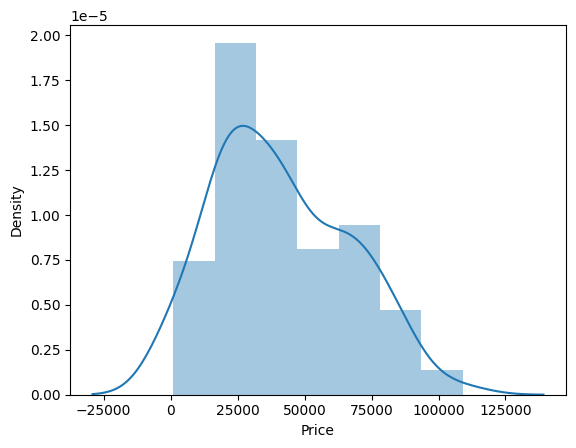

In [ ]:
import seaborn as sns
sns.distplot(df['Price'])

<Axes: >

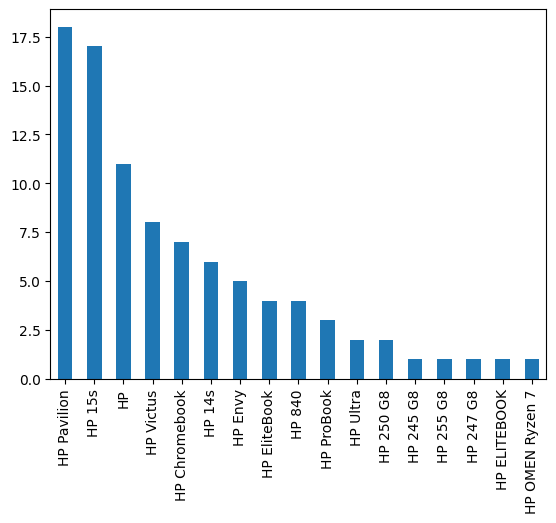

In [ ]:
df['Model Name'].value_counts().plot(kind = 'bar')

<Axes: >

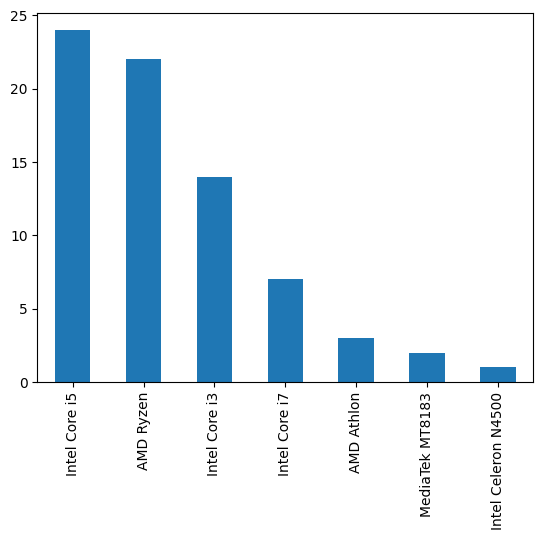

In [ ]:
df['Processor'].value_counts().plot(kind = 'bar')

<Axes: >

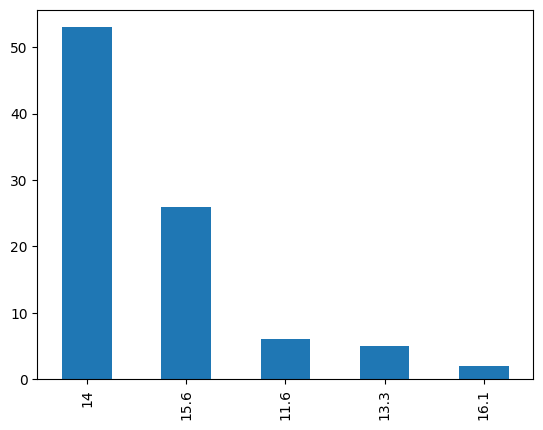

In [ ]:
df['Lap Inches'].value_counts().plot(kind = 'bar')

<Axes: >

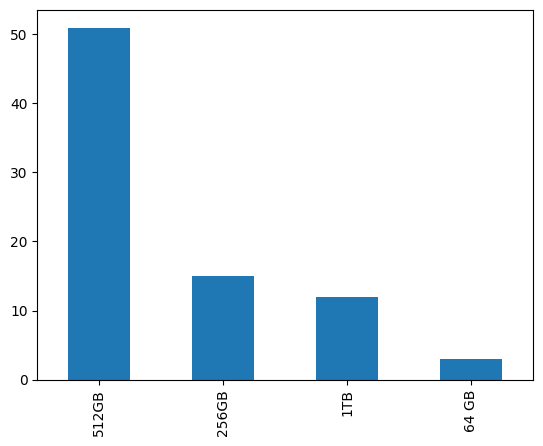

In [ ]:
df['Memory'].value_counts().plot(kind ='bar')

<Axes: >

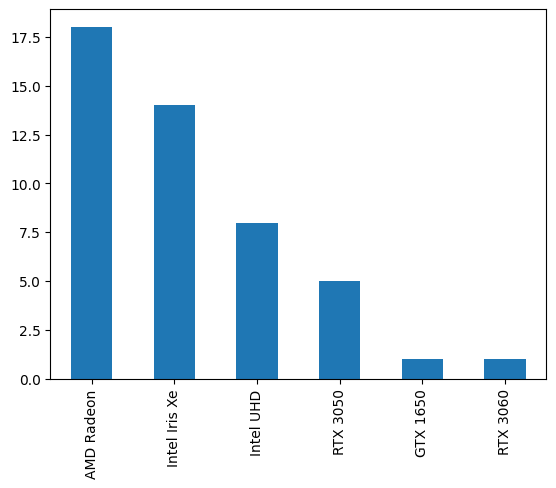

In [ ]:
df['Gpu'].value_counts().plot(kind = 'bar')

<Axes: >

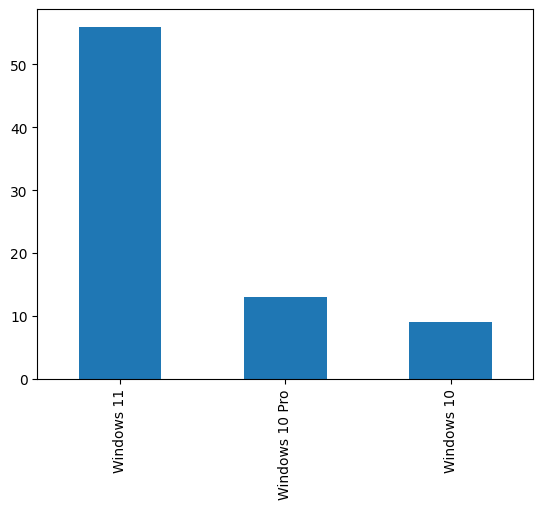

In [ ]:
df['Op Sys'].value_counts().plot(kind = 'bar')

##Relation between all other features with price

<ipython-input-116-519dc304c273>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Model Name'],y=df['Price'],ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'HP 15s'),
  Text(1, 0, 'HP 14s'),
  Text(2, 0, 'HP Victus'),
  Text(3, 0, 'HP Pavilion'),
  Text(4, 0, 'HP 247 G8'),
  Text(5, 0, 'HP 245 G8'),
  Text(6, 0, 'HP 840'),
  Text(7, 0, 'HP Chromebook'),
  Text(8, 0, 'HP EliteBook'),
  Text(9, 0, 'HP ProBook'),
  Text(10, 0, 'HP'),
  Text(11, 0, 'HP 255 G8'),
  Text(12, 0, 'HP Ultra'),
  Text(13, 0, 'HP 250 G8'),
  Text(14, 0, 'HP Envy'),
  Text(15, 0, 'HP ELITEBOOK'),
  Text(16, 0, 'HP OMEN Ryzen 7')])

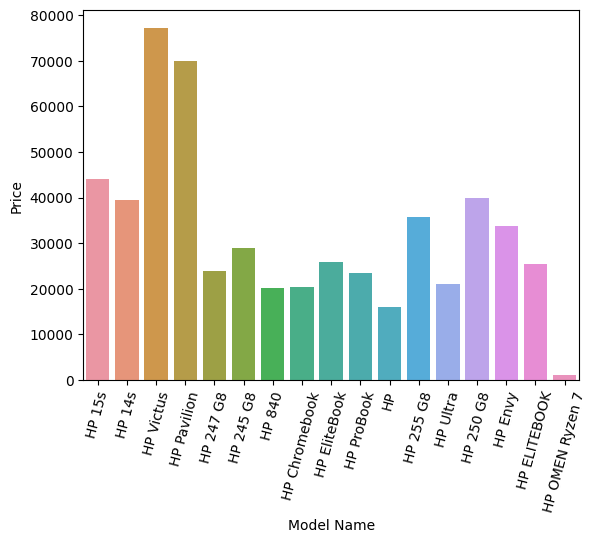

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Model Name'],y=df['Price'],ci=None)
plt.xticks(rotation = 75)

<ipython-input-117-d93b88388102>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Op Sys'],y = df['Price'],ci=None)


<Axes: xlabel='Op Sys', ylabel='Price'>

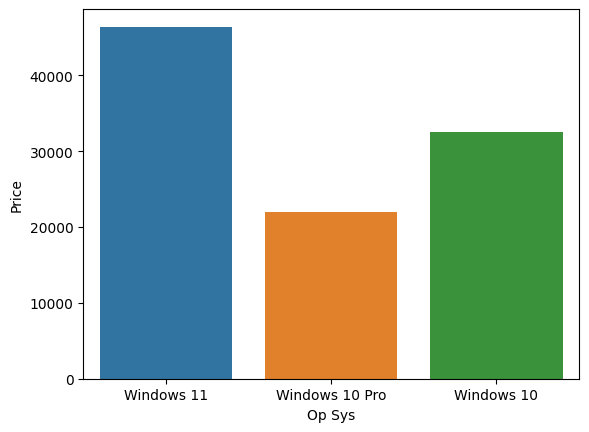

In [ ]:
sns.barplot(x = df['Op Sys'],y = df['Price'],ci=None)

<ipython-input-118-207c899ae0dd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Gpu'],y = df['Price'],ci=None)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intel UHD'),
  Text(1, 0, 'Intel Iris Xe'),
  Text(2, 0, 'AMD Radeon'),
  Text(3, 0, 'RTX 3050'),
  Text(4, 0, 'GTX 1650'),
  Text(5, 0, 'RTX 3060')])

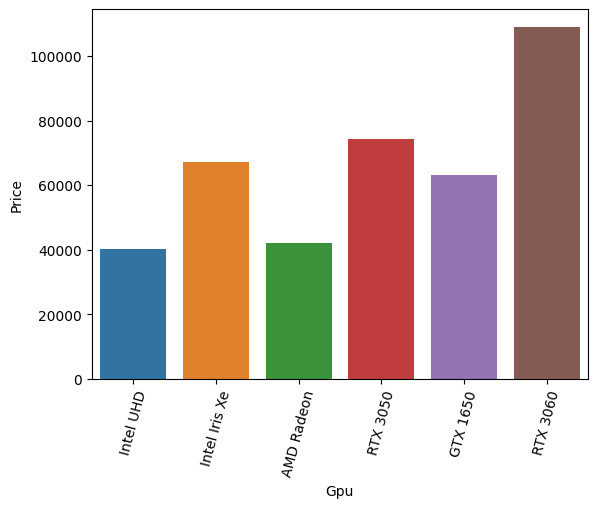

In [ ]:
sns.barplot(x = df['Gpu'],y = df['Price'],ci=None)
plt.xticks(rotation = 75)

<ipython-input-119-64334f1b99cd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['New/Renewed'],y = df['Price'],ci=None)


<Axes: xlabel='New/Renewed', ylabel='Price'>

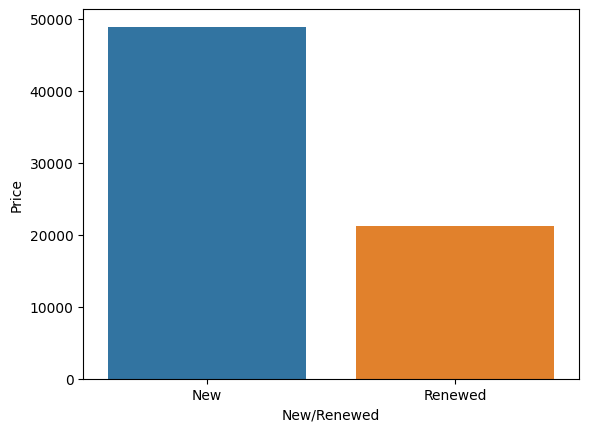

In [ ]:
sns.barplot(x = df['New/Renewed'],y = df['Price'],ci=None)

<ipython-input-120-d7554a7531fa>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Lap Inches'],y = df['Price'],ci=None)


<Axes: xlabel='Lap Inches', ylabel='Price'>

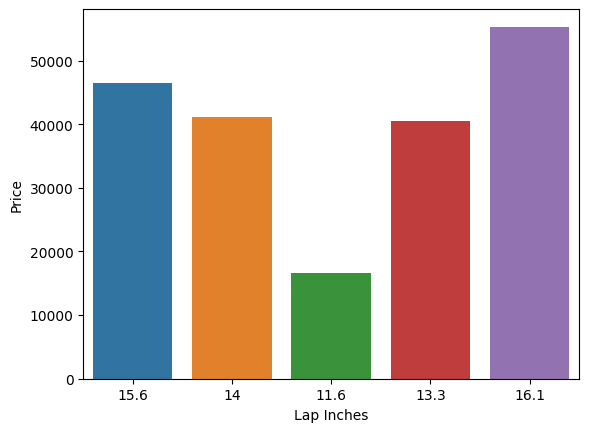

In [ ]:
sns.barplot(x = df['Lap Inches'],y = df['Price'],ci=None)

<ipython-input-121-4b48cbe06233>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Weight(Kg)'],y = df['Price'],ci=None)


<Axes: xlabel='Weight(Kg)', ylabel='Price'>

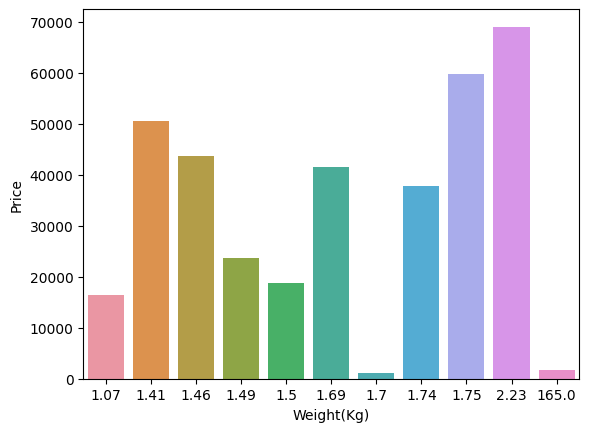

In [ ]:
sns.barplot(x = df['Weight(Kg)'],y = df['Price'],ci=None)

<ipython-input-122-843b8e153873>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['RAM'],y = df['Price'],ci=None)


<Axes: xlabel='RAM', ylabel='Price'>

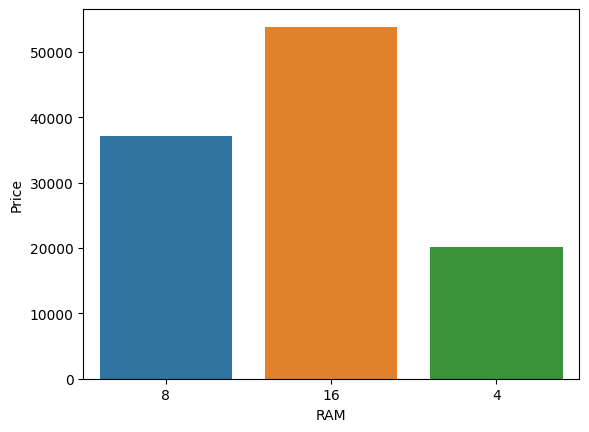

In [ ]:
sns.barplot(x = df['RAM'],y = df['Price'],ci=None)

<ipython-input-123-b1c6cd6635c1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df['Memory'],y = df['Price'],ci=None)


<Axes: xlabel='Memory', ylabel='Price'>

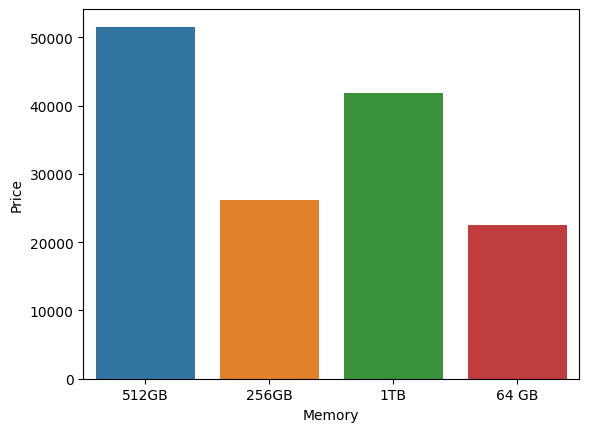

In [ ]:
sns.barplot(x = df['Memory'],y = df['Price'],ci=None)